In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [3]:
data=pd.read_csv("C:\\Users\\DELL\\Desktop\\assignments\\Toyota.csv",encoding='latin1')

In [4]:
data1=data[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]

In [5]:
data1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [6]:
d1=data1.rename({'Age_08_04':'Age','Quarterly_Tax':'Tax'},axis=1)
d1

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [7]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   Tax     1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [8]:
d1.isna().sum()

Price     0
Age       0
KM        0
HP        0
cc        0
Doors     0
Gears     0
Tax       0
Weight    0
dtype: int64

# Correlation Matrix

In [9]:
d1.corr()

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


### Scatterplot b/w variables along with Histograms

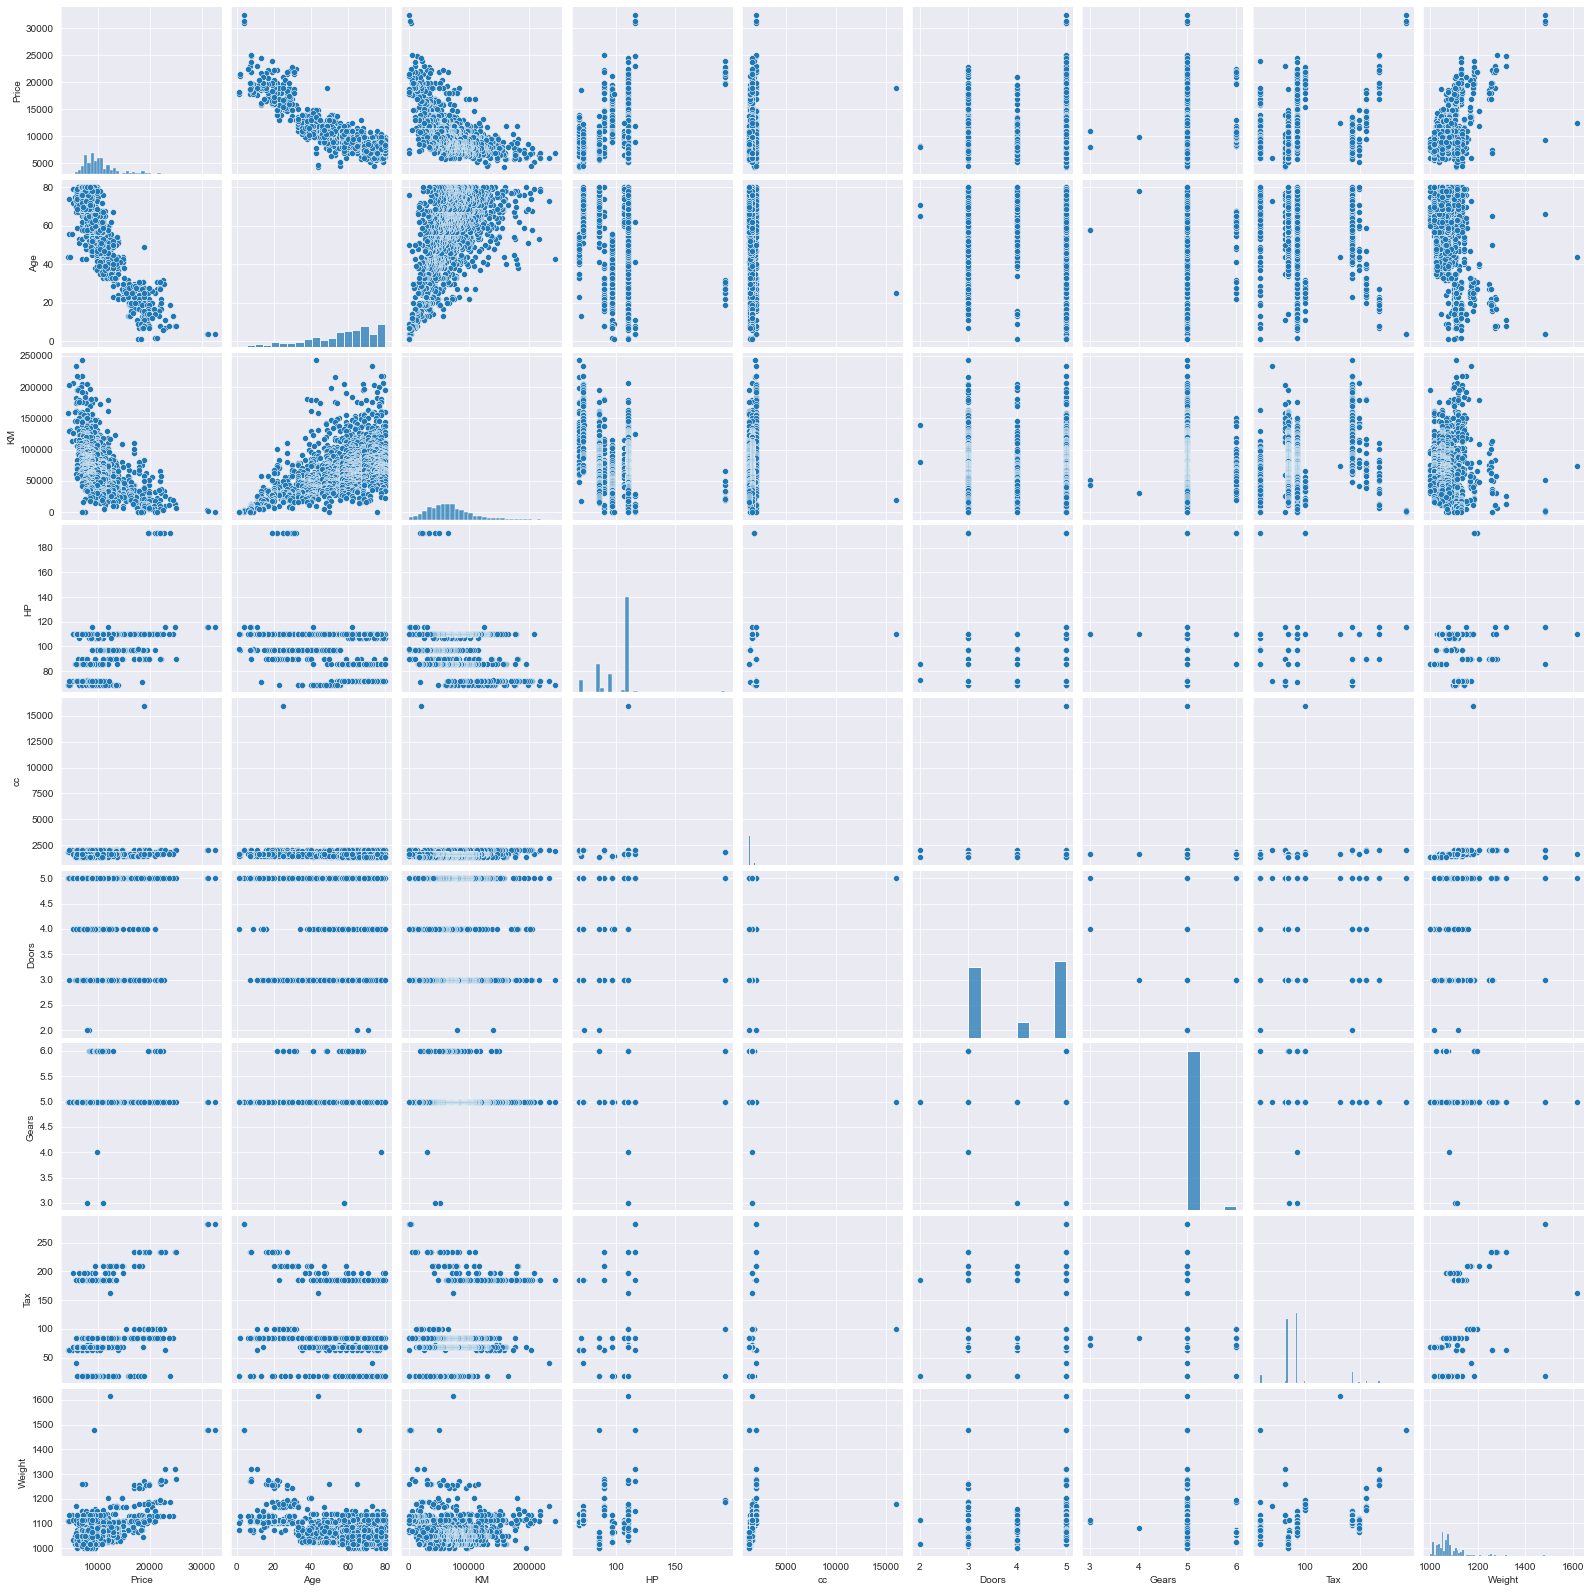

In [10]:
sns.set_style(style='darkgrid')
sns.pairplot(d1)

# Preparing Model

In [11]:
model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight',data=d1).fit()

In [12]:
model.fittedvalues

0       16812.580505
1       16272.355186
2       16800.732460
3       16426.496731
4       16222.419010
            ...     
1431     8793.758297
1432     8291.338421
1433     8454.298007
1434     8578.038121
1435    10402.438333
Length: 1436, dtype: float64

In [13]:
model.params

Intercept   -5573.106358
Age          -121.658402
KM             -0.020817
HP             31.680906
cc             -0.121100
Doors          -1.616641
Gears         594.319936
Tax             3.949081
Weight         16.958632
dtype: float64

In [14]:
print(model.tvalues,'\n',model.pvalues)

Intercept    -3.948666
Age         -46.511852
KM          -16.621622
HP           11.241018
cc           -1.344222
Doors        -0.040410
Gears         3.016007
Tax           3.014535
Weight       15.879803
dtype: float64 
 Intercept     8.241949e-05
Age          3.354724e-288
KM            7.538439e-57
HP            3.757218e-28
cc            1.790902e-01
Doors         9.677716e-01
Gears         2.606549e-03
Tax           2.619148e-03
Weight        2.048576e-52
dtype: float64


In [15]:
model.pvalues

Intercept     8.241949e-05
Age          3.354724e-288
KM            7.538439e-57
HP            3.757218e-28
cc            1.790902e-01
Doors         9.677716e-01
Gears         2.606549e-03
Tax           2.619148e-03
Weight        2.048576e-52
dtype: float64

In [16]:
(model.rsquared,model.rsquared_adj)

(0.8637627463428192, 0.8629989775766963)

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Mon, 25 Apr 2022   Prob (F-statistic):               0.00
Time:                        00:27:39   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
Tax            3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Calculating VIF(Varience inflation factor)

In [18]:
rsq_Price=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight',data=d1).fit().rsquared
vif_Price=1/(1-rsq_Price)

rsq_Age=smf.ols('Age~Price+KM+HP+cc+Doors+Gears+Tax+Weight',data=d1).fit().rsquared
vif_Age=1/(1-rsq_Age)

rsq_KM=smf.ols('KM~Price+Age+HP+cc+Doors+Gears+Tax+Weight',data=d1).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Price+Age+KM+cc+Doors+Gears+Tax+Weight',data=d1).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_cc=smf.ols('cc~Price+Age+KM+HP+Doors+Gears+Tax+Weight',data=d1).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_Doors=smf.ols('Doors~Price+Age+KM+HP+cc+Gears+Tax+Weight',data=d1).fit().rsquared
vif_Doors=1/(1-rsq_Doors)

rsq_Gears=smf.ols('Gears~Price+Age+KM+HP+cc+Doors+Tax+Weight',data=d1).fit().rsquared
vif_Gears=1/(1-rsq_Gears)

rsq_Tax=smf.ols('Tax~Price+Age+KM+HP+cc+Doors+Gears+Weight',data=d1).fit().rsquared
vif_Tax=1/(1-rsq_Tax)

rsq_Weight=smf.ols('Weight~Price+Age+KM+HP+cc+Doors+Gears+Tax',data=d1).fit().rsquared
vif_Weight=1/(1-rsq_Weight)




In [19]:
# storing vif values in a data frame
d2={'Variables':['Price','Age','KM','HP','cc','Doors','Gears','Tax','Weight'],'VIF':[vif_Price,vif_Age,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_Tax,vif_Weight]}
vif_frame=pd.DataFrame(d2)
vif_frame

,Variables,VIF
0,Price,7.340136
1,Age,4.741730
2,KM,2.097055
3,HP,1.545112
4,cc,1.165368
5,Doors,1.156577
6,Gears,1.105727
7,Tax,2.326150
8,Weight,2.961102


In [20]:
d1['Predicted']=model.fittedvalues
d1['Errors']=model.resid
d1

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight,Predicted,Errors
0,13500,23,46986,90,2000,3,5,210,1165,16812.580505,-3312.580505
1,13750,23,72937,90,2000,3,5,210,1165,16272.355186,-2522.355186
2,13950,24,41711,90,2000,3,5,210,1165,16800.732460,-2850.732460
3,14950,26,48000,90,2000,3,5,210,1165,16426.496731,-1476.496731
4,13750,30,38500,90,2000,3,5,210,1170,16222.419010,-2472.419010
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025,8793.758297,-1293.758297
1432,10845,72,19000,86,1300,3,5,69,1015,8291.338421,2553.661579
1433,8500,71,17016,86,1300,3,5,69,1015,8454.298007,45.701993
1434,7250,70,16916,86,1300,3,5,69,1015,8578.038121,-1328.038121


# Residual Analysis

### Test for normality of Residual (Q-Q Plot)

In [21]:
model.resid

0      -3312.580505
1      -2522.355186
2      -2850.732460
3      -1476.496731
4      -2472.419010
           ...     
1431   -1293.758297
1432    2553.661579
1433      45.701993
1434   -1328.038121
1435   -3452.438333
Length: 1436, dtype: float64

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


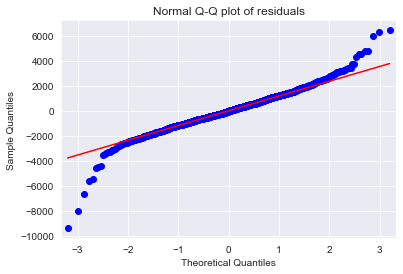

In [22]:
# Q-Q =Quantile -Quantile
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Errors'>

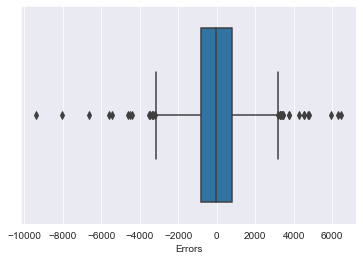

In [23]:
sns.boxplot(d1['Errors'])

## Residual Plot for Homoscedasticity

In [24]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

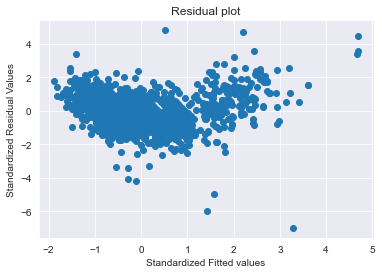

In [25]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))

plt.title('Residual plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized Residual Values')
plt.show()

# Cook's Distance

In [26]:
d1.shape

(1436, 11)

In [27]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

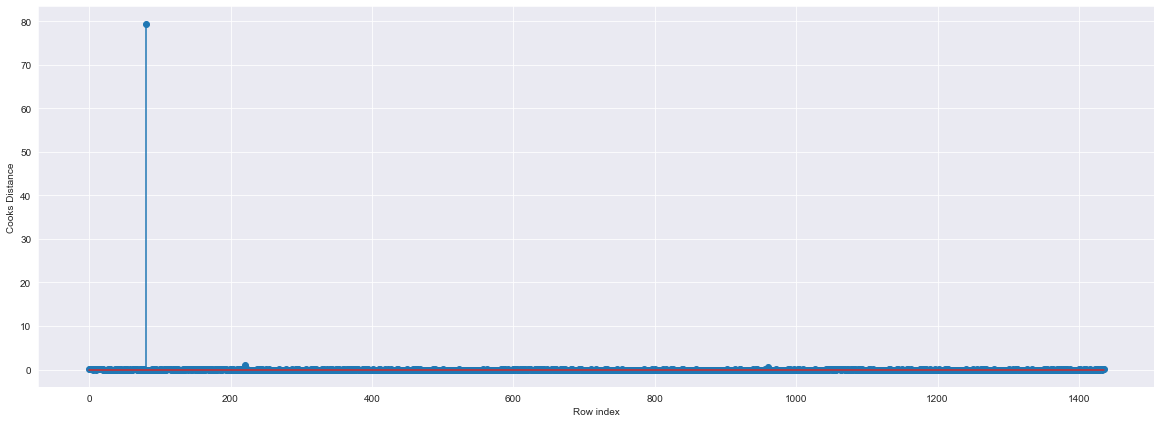

In [28]:
# plot the influencers values using stem plot
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(d1)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [29]:
(np.argmax(c),np.max(c))

(80, 79.52010624138055)

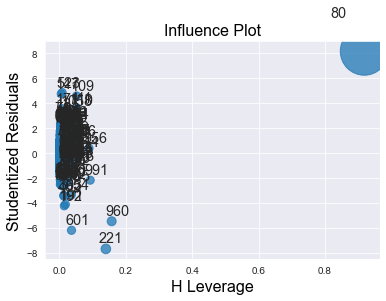

In [30]:
# High influence points
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [31]:
k=d1.shape[1]
n=d1.shape[0]
leverae_cutoff=3*((k+1)/n)

In [32]:
leverae_cutoff

0.02506963788300836

# final model

In [33]:
newdata=d1.drop(d1.index[80],axis=0).reset_index()

In [34]:
newdata

,index,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight,Predicted,Errors
0,0,13500,23,46986,90,2000,3,5,210,1165,16812.580505,-3312.580505
1,1,13750,23,72937,90,2000,3,5,210,1165,16272.355186,-2522.355186
2,2,13950,24,41711,90,2000,3,5,210,1165,16800.732460,-2850.732460
3,3,14950,26,48000,90,2000,3,5,210,1165,16426.496731,-1476.496731
4,4,13750,30,38500,90,2000,3,5,210,1170,16222.419010,-2472.419010
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025,8793.758297,-1293.758297
1431,1432,10845,72,19000,86,1300,3,5,69,1015,8291.338421,2553.661579
1432,1433,8500,71,17016,86,1300,3,5,69,1015,8454.298007,45.701993
1433,1434,7250,70,16916,86,1300,3,5,69,1015,8578.038121,-1328.038121


In [35]:
newdata=newdata.drop(['index'],axis=1)
newdata

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight,Predicted,Errors
0,13500,23,46986,90,2000,3,5,210,1165,16812.580505,-3312.580505
1,13750,23,72937,90,2000,3,5,210,1165,16272.355186,-2522.355186
2,13950,24,41711,90,2000,3,5,210,1165,16800.732460,-2850.732460
3,14950,26,48000,90,2000,3,5,210,1165,16426.496731,-1476.496731
4,13750,30,38500,90,2000,3,5,210,1170,16222.419010,-2472.419010
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025,8793.758297,-1293.758297
1431,10845,72,19000,86,1300,3,5,69,1015,8291.338421,2553.661579
1432,8500,71,17016,86,1300,3,5,69,1015,8454.298007,45.701993
1433,7250,70,16916,86,1300,3,5,69,1015,8578.038121,-1328.038121


In [36]:
final_model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight',data=newdata).fit()

In [37]:
final_model.fittedvalues

0       16528.990607
1       16065.803813
2       16502.686471
3       16149.527067
4       15938.095051
            ...     
1430     8971.183912
1431     8435.722285
1432     8591.588786
1433     8713.828687
1434     9969.788925
Length: 1435, dtype: float64

In [38]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Mon, 25 Apr 2022   Prob (F-statistic):               0.00
Time:                        00:27:53   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age         -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM            -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP            39.3463      2.911     13.516      0.000      33.636      45.057
cc            -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors        -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears        523.9416    192.865      2.717      0.007     145.612     902.271
Tax            9.0440      1.425      6.348      0.000       6.249      11.839
Weight        20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
final_model_influence=final_model.get_influence()
(c,_)=final_model_influence.cooks_distance

In [40]:
c

array([6.76188181e-03, 3.63236662e-03, 4.92319660e-03, ...,
       3.63997681e-06, 9.09665729e-04, 9.71186915e-03])

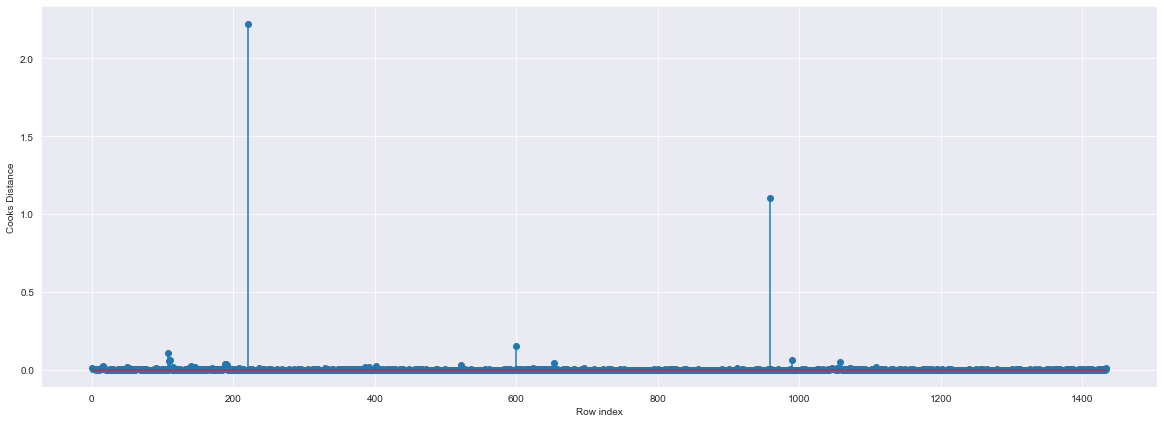

In [41]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(newdata)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [42]:
(np.argmax(c),np.max(c))

(220, 2.2244611713001508)

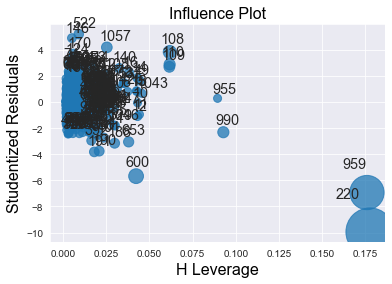

In [43]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(final_model)
plt.show()

In [44]:
ndata=d1.drop(newdata.index[220],axis=0).reset_index()

In [45]:
ndata

,index,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight,Predicted,Errors
0,0,13500,23,46986,90,2000,3,5,210,1165,16812.580505,-3312.580505
1,1,13750,23,72937,90,2000,3,5,210,1165,16272.355186,-2522.355186
2,2,13950,24,41711,90,2000,3,5,210,1165,16800.732460,-2850.732460
3,3,14950,26,48000,90,2000,3,5,210,1165,16426.496731,-1476.496731
4,4,13750,30,38500,90,2000,3,5,210,1170,16222.419010,-2472.419010
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025,8793.758297,-1293.758297
1431,1432,10845,72,19000,86,1300,3,5,69,1015,8291.338421,2553.661579
1432,1433,8500,71,17016,86,1300,3,5,69,1015,8454.298007,45.701993
1433,1434,7250,70,16916,86,1300,3,5,69,1015,8578.038121,-1328.038121


In [46]:
newdata=ndata.drop(['index'],axis=1)
newdata

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight,Predicted,Errors
0,13500,23,46986,90,2000,3,5,210,1165,16812.580505,-3312.580505
1,13750,23,72937,90,2000,3,5,210,1165,16272.355186,-2522.355186
2,13950,24,41711,90,2000,3,5,210,1165,16800.732460,-2850.732460
3,14950,26,48000,90,2000,3,5,210,1165,16426.496731,-1476.496731
4,13750,30,38500,90,2000,3,5,210,1170,16222.419010,-2472.419010
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025,8793.758297,-1293.758297
1431,10845,72,19000,86,1300,3,5,69,1015,8291.338421,2553.661579
1432,8500,71,17016,86,1300,3,5,69,1015,8454.298007,45.701993
1433,7250,70,16916,86,1300,3,5,69,1015,8578.038121,-1328.038121


In [47]:
f_model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight',data=ndata).fit()

In [48]:
f_model.fittedvalues

0       16812.485730
1       16272.544070
2       16800.551288
3       16426.326824
4       16221.992785
            ...     
1430     8792.850525
1431     8290.402603
1432     8453.369242
1433     8577.137002
1434    10401.638511
Length: 1435, dtype: float64

In [49]:
f_model_influence=f_model.get_influence()
(c,_)=f_model_influence.cooks_distance

In [50]:
c

array([7.23212732e-03, 3.96621901e-03, 5.46088317e-03, ...,
       8.79359917e-07, 6.96850035e-04, 1.08531099e-02])

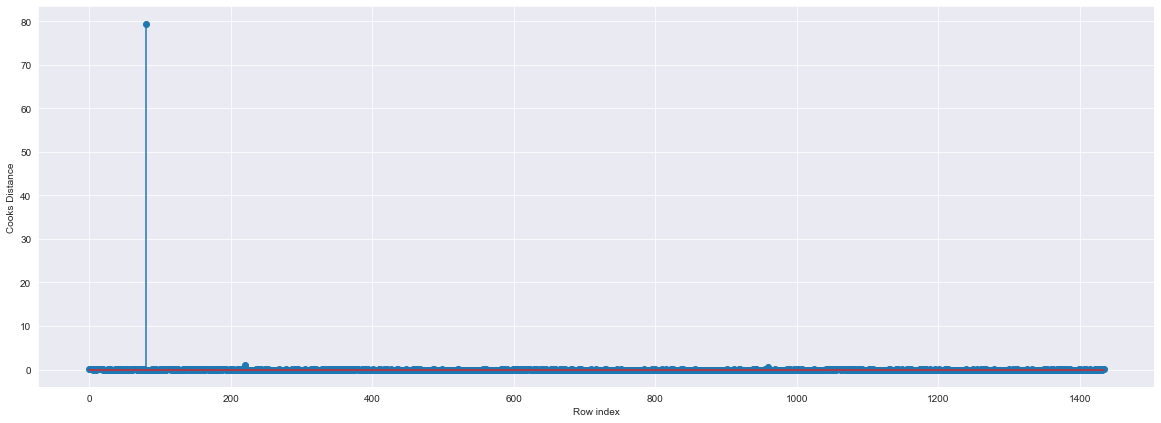

In [51]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(ndata)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [52]:
(np.argmax(c),np.max(c))

(80, 79.44582938671232)

In [53]:
d=d1.drop(ndata.index[80],axis=0).reset_index()

In [54]:
d

,index,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight,Predicted,Errors
0,0,13500,23,46986,90,2000,3,5,210,1165,16812.580505,-3312.580505
1,1,13750,23,72937,90,2000,3,5,210,1165,16272.355186,-2522.355186
2,2,13950,24,41711,90,2000,3,5,210,1165,16800.732460,-2850.732460
3,3,14950,26,48000,90,2000,3,5,210,1165,16426.496731,-1476.496731
4,4,13750,30,38500,90,2000,3,5,210,1170,16222.419010,-2472.419010
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025,8793.758297,-1293.758297
1431,1432,10845,72,19000,86,1300,3,5,69,1015,8291.338421,2553.661579
1432,1433,8500,71,17016,86,1300,3,5,69,1015,8454.298007,45.701993
1433,1434,7250,70,16916,86,1300,3,5,69,1015,8578.038121,-1328.038121


In [55]:
newdata=d.drop(['index'],axis=1)
newdata

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight,Predicted,Errors
0,13500,23,46986,90,2000,3,5,210,1165,16812.580505,-3312.580505
1,13750,23,72937,90,2000,3,5,210,1165,16272.355186,-2522.355186
2,13950,24,41711,90,2000,3,5,210,1165,16800.732460,-2850.732460
3,14950,26,48000,90,2000,3,5,210,1165,16426.496731,-1476.496731
4,13750,30,38500,90,2000,3,5,210,1170,16222.419010,-2472.419010
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025,8793.758297,-1293.758297
1431,10845,72,19000,86,1300,3,5,69,1015,8291.338421,2553.661579
1432,8500,71,17016,86,1300,3,5,69,1015,8454.298007,45.701993
1433,7250,70,16916,86,1300,3,5,69,1015,8578.038121,-1328.038121
